# Human Face Detection using OpenCV and Haar Cascade Classifier

## 1. Import necessary libraries

In [ ]:
!pip install opencv-python matplotlib requests

## 2. import library and use pretrained classifier for face detection

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

## 3. Fetch image from user

In [ ]:
def fetch_image(url):
    # Send a GET request to the URL and return the image in numpy array format
    response = requests.get(url)
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    return image

## 4. Detect human face

In [ ]:
def detect_faces(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    return image, faces

## 5. Visualise detection

Enter the image URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHr74Pjdj__bQPnZK-BFujbwgnP1t5PIqkig&s


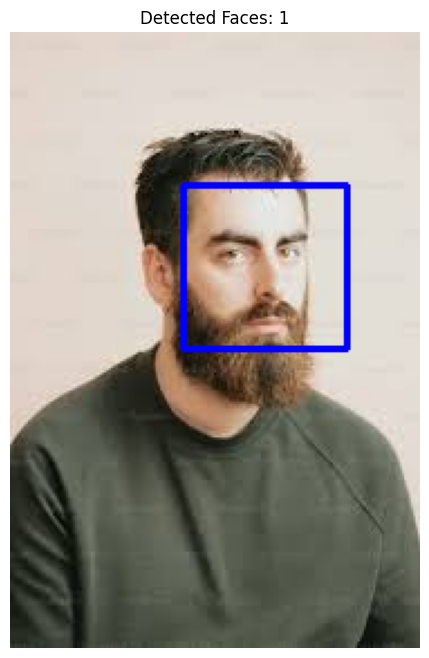

In [ ]:
def visualize_detection(image, faces):
    # Convert BGR to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plotting the image with detected faces
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f'Detected Faces: {len(faces)}')
    plt.show()

# Input: URL from user
image_url = input("Enter the image URL: ")

# Fetch the image from the provided URL
detected_image = fetch_image(image_url)

# Perform face detection
detected_image, detected_faces = detect_faces(detected_image)

# Visualize the detection results
visualize_detection(detected_image, detected_faces)